In [2]:
import importlib
from optimize import data
importlib.reload(data)

<module 'optimize.data' from '/home/tanetakumi/main/hfq-optimizer/scripts/optimize/optimize/data.py'>

In [2]:
netlist_data = """

.model jjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA)
.model pjjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA, PHI=PI)

* PYSQUID=====================================
.subckt psquid1        3  5 
L1                 3         1   #SQUIDL1(1.75)pH fcheck
L2                 3         4   #SQUIDL1(1.75)pH fcheck
B1                 1         5   jjmod area=#JJAREA1(v=0.5, shunt = JJSHUNT3)
R1                 1         5   #JJSHUNT1(15.7)ohm
B2                 2         5   jjmod area=#JJAREA1(v=0.5)
R2                 2         5   #JJSHUNT1(15.7)ohm
B3                 4         2   pjjmod area=#PJJAREA1(20, fix = true, dp = false)
.ends

.subckt psquid2        3  5 
L1                 3         1   #SQUIDL2(1.75)pH fcheck
L2                 3         4   #SQUIDL2(1.75)pH fcheck
B1                 1         5   jjmod area=#JJAREA2(v=0.5, shunt = JJSHUNT3)
R1                 1         5   #JJSHUNT2(15.7)ohm
B2                 2         5   jjmod area=#JJAREA2(v=0.5)
R2                 2         5   #JJSHUNT2(15.7)ohm
B3                 4         2   pjjmod area=#PJJAREA2(20, fix = true, dp = false)
.ends

.subckt psquid3        3  5 
L1                 3         1   #SQUIDL3(1.75)pH fcheck
L2                 3         4   #SQUIDL3(1.75)pH fcheck
B1                 1         5   jjmod area=#JJAREA3(v=0.5, shunt = JJSHUNT3)
R1                 1         5   #JJSHUNT3(15.7)ohm
B2                 2         5   jjmod area=#JJAREA3(v=0.5)
R2                 2         5   #JJSHUNT3(15.7)ohm
B3                 4         2   pjjmod area=#PJJAREA3(20, fix = true, dp = false)
.ends
* ============================================

.subckt DCHFQ 1 6 100
* 250-350  750-850  1250-1350
Rin                     1        2    #DCHFQR1(1090, dpv = 20)ohm
L0                      2        3    2pH fcheck
L1                      3        0    #DCHFQL1(44, dpv = 13)pH fcheck
X1       psquid1         3        4
L3                      4        5    #DCHFQL2(4.27)pH fcheck
L4                      5        6    #DCHFQL3(2.00, fix = true, dp=False)pH fcheck
R1                      100      5    #DCHFQR2(8.3)ohm
X2       psquid2         6        0
.ends

.subckt JTL     1  5  100
L1              1  2   #JTLL1(2.3)pH fcheck
L2              2  3   #JTLL1(2.3)pH fcheck
L3              3  4   #JTLL1(2.3)pH fcheck
L4              4  5   #JTLL1(2.3)pH fcheck
X1    psquid3       3  0
X2    psquid3       5  0
R1               100  4   #JTLR1(8.3)ohm
R2               100  2   #JTLR1(8.3)ohm
.ends

.subckt JTL4    1  5  100
X1       JTL            1  2  100
X2       JTL            2  3  100
X3       JTL            3  4  100
X4       JTL            4  5  100
.ends

*** top cell:  
Vin                     1   0    PWL(0ps 0mV 440ps 0mV 450ps 25mV 550ps 25mV 560ps 0mV   840ps 0mV 850ps 25mV 950ps 25mV 960ps 0mV   1240ps 0mV 1250ps 25mV 1350ps 25mV 1360ps 0mV)
X1      DCHFQ           1   2  100
X2      JTL4            2   3   100
X3      JTL4            3   4   100
X4      JTL4            4   5   100

R2                      5     13  8.32ohm
L5                      13     0  2pH fcheck
Vb                      100    0  pwl(0ps 0mV 100ps #BIAS(v=0.1,fix = true, dp = false)mV)


**netlis file
.tran 1.0ps 2000ps 0ps 1ps

.print phase B1|X1|X1|X2
.print phase B2|X1|X1|X2


.print phase B1|X1|X1|X4
.print phase B2|X1|X1|X4

.end

**** optimize ****
* バイアス電圧の立ち上がり終了の時間
* EndTimeOfBiasRise=100e-12
* 初期パルスの入力開始時間
* StartTimeOfPulseInput=400e-12
* 許容できるパルスの遅延
* PulseDelay=4.0e-11
"""

--- List of variables to optimize ---
              def     main      sub element    fix     shunt     dp   dpv  tmp
char                                                                          
SQUIDL1      1.75     1.75     1.75       L    0.0      None    1.0   7.0  0.0
JJAREA1      0.50     0.50     0.50       B  False  JJSHUNT3   True   7.0  0.0
JJSHUNT1    15.70    15.70    15.70       R  False      None   True   7.0  0.0
PJJAREA1    20.00    20.00    20.00       B   True      None  False   7.0  0.0
SQUIDL2      1.75     1.75     1.75       L  False      None   True   7.0  0.0
JJAREA2      0.50     0.50     0.50       B  False  JJSHUNT3   True   7.0  0.0
JJSHUNT2    15.70    15.70    15.70       R  False      None   True   7.0  0.0
PJJAREA2    20.00    20.00    20.00       B   True      None  False   7.0  0.0
SQUIDL3      1.75     1.75     1.75       L  False      None   True   7.0  0.0
JJAREA3      0.50     0.50     0.50       B  False  JJSHUNT3   True   7.0  0.0
JJSHUNT3    15

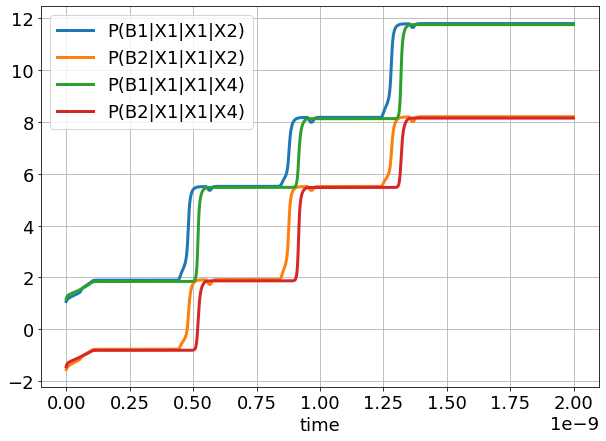

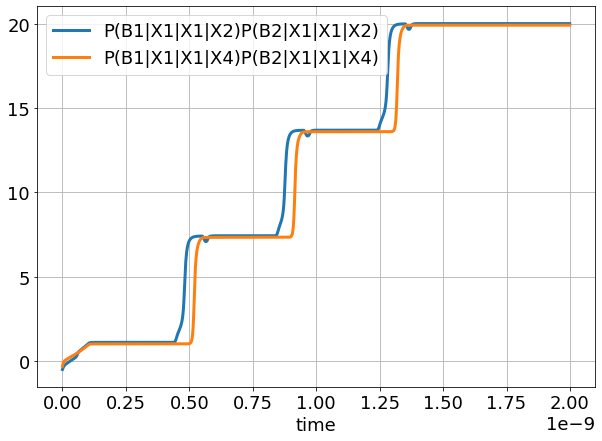

In [8]:
d = data.Data(netlist_data, True)

--- List of variables to optimize ---
              def     main      sub element    fix     shunt     dp   dpv  tmp
char                                                                          
SQUIDL1     1.730    1.730    1.730       L    0.0      None    1.0   7.0  0.0
JJAREA1     0.560    0.560    0.560       B  False  JJSHUNT3   True   7.0  0.0
JJSHUNT1   16.090   16.090   16.090       R  False      None   True   7.0  0.0
PJJAREA1   20.000   20.000   20.000       B   True      None  False   7.0  0.0
SQUIDL2     1.840    1.840    1.840       L  False      None   True   7.0  0.0
JJAREA2     0.512    0.512    0.512       B  False  JJSHUNT3   True   7.0  0.0
JJSHUNT2   15.820   15.820   15.820       R  False      None   True   7.0  0.0
PJJAREA2   20.000   20.000   20.000       B   True      None  False   7.0  0.0
SQUIDL3     2.075    2.075    2.075       L  False      None   True   7.0  0.0
JJAREA3     0.540    0.540    0.540       B  False  JJSHUNT3   True   7.0  0.0
JJSHUNT3   15.

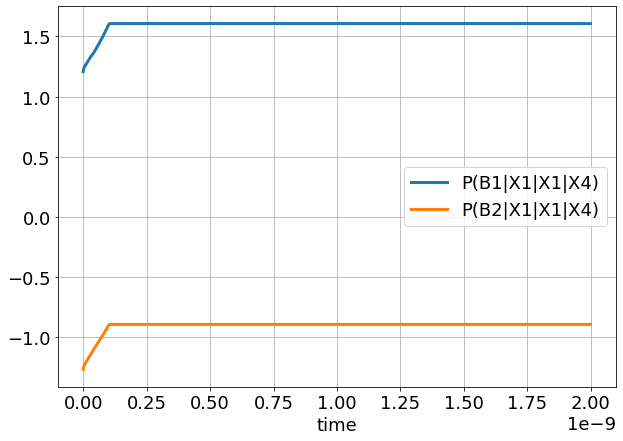

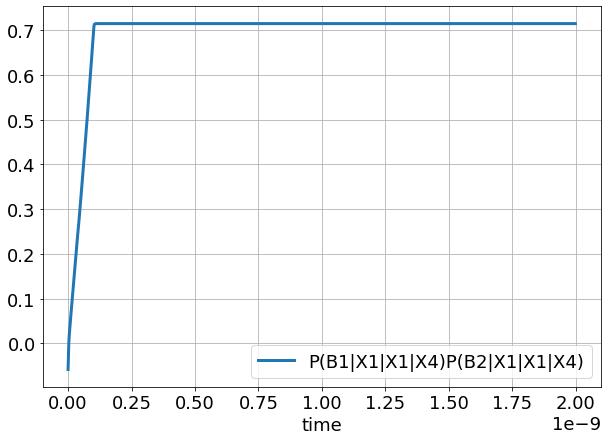

In [8]:
netlist_data2 = """

.model jjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA)
.model pjjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA, PHI=PI)

* PYSQUID=====================================
.subckt psquid1        3  5 
L1                 3         1   #SQUIDL1(1.73)pH fcheck
L2                 3         4   #SQUIDL1(1.73)pH fcheck
B1                 1         5   jjmod area=#JJAREA1(v=0.56, shunt = JJSHUNT3)
R1                 1         5   #JJSHUNT1(16.09)ohm
B2                 2         5   jjmod area=#JJAREA1(v=0.56)
R2                 2         5   #JJSHUNT1(16.09)ohm
B3                 4         2   pjjmod area=#PJJAREA1(20, fix = true, dp = false)
.ends

.subckt psquid2        3  5 
L1                 3         1   #SQUIDL2(1.84)pH fcheck
L2                 3         4   #SQUIDL2(1.84)pH fcheck
B1                 1         5   jjmod area=#JJAREA2(v=0.512, shunt = JJSHUNT3)
R1                 1         5   #JJSHUNT2(15.82)ohm
B2                 2         5   jjmod area=#JJAREA2(v=0.512)
R2                 2         5   #JJSHUNT2(15.82)ohm
B3                 4         2   pjjmod area=#PJJAREA2(20, fix = true, dp = false)
.ends

.subckt psquid3        3  5 
L1                 3         1   #SQUIDL3(2.075)pH fcheck
L2                 3         4   #SQUIDL3(2.075)pH fcheck
B1                 1         5   jjmod area=#JJAREA3(v=0.54, shunt = JJSHUNT3)
R1                 1         5   #JJSHUNT3(15.41)ohm
B2                 2         5   jjmod area=#JJAREA3(v=0.54)
R2                 2         5   #JJSHUNT3(15.41)ohm
B3                 4         2   pjjmod area=#PJJAREA3(20, fix = true, dp = false)
.ends
* ============================================

.subckt DCHFQ 1 6 100
* 250-350  750-850  1250-1350
Rin                     1        2    #DCHFQR1(374, dpv = 20)ohm
L0                      2        3    2pH fcheck
L1                      3        0    #DCHFQL1(18.25, dpv = 13)pH fcheck
X1       psquid1         3        4
L3                      4        5    #DCHFQL2(4.26)pH fcheck
L4                      5        6    #DCHFQL3(2.00, fix = true, dp=False)pH fcheck
R1                      100      5    #DCHFQR1(25, dpv = 10)ohm
X2       psquid2         6        0
.ends

.subckt JTL     1  5  100
L1              1  2   #JTLL1(2.3)pH fcheck
L2              2  3   #JTLL1(2.3)pH fcheck
L3              3  4   #JTLL1(2.3)pH fcheck
L4              4  5   #JTLL1(2.3)pH fcheck
X1    psquid3       3  0
X2    psquid3       5  0
R1               100  4   #BIASR1(25, dpv = 10)ohm
R2               100  2   #BIASR1(25)ohm
.ends

.subckt JTL4    1  5  100
X1       JTL            1  2  100
X2       JTL            2  3  100
X3       JTL            3  4  100
X4       JTL            4  5  100
.ends

*** top cell:  
Vin                     1   0    PWL(0ps 0mV 440ps 0mV 450ps 25mV 550ps 25mV 560ps 0mV   840ps 0mV 850ps 25mV 950ps 25mV 960ps 0mV   1240ps 0mV 1250ps 25mV 1350ps 25mV 1360ps 0mV)
X1      DCHFQ           1   2  100
X2      JTL4            2   3   100
X3      JTL4            3   4   100
X4      JTL4            4   5   100

R2                      5     13  8.32ohm
L5                      13     0  2pH fcheck
Vb                      100    0  pwl(0ps 0mV 100ps #BIAS(v=0.3,fix = true, dp = false)mV)


**netlis file
.tran 1.0ps 2000ps 0ps 1ps


.print phase B1|X1|X1|X4
.print phase B2|X1|X1|X4

.end

**** optimize ****
* バイアス電圧の立ち上がり終了の時間
* EndTimeOfBiasRise=100e-12
* 初期パルスの入力開始時間
* StartTimeOfPulseInput=400e-12
* 許容できるパルスの遅延
* PulseDelay=3.0e-11
"""
d2 = data.Data(netlist_data2,True)

,low(value),low(%),high(value),high(%)
JJSHUNT1,0.674609,-95.703125,31.400000,100.00000
JJSHUNT2,1.901172,-87.890625,31.400000,100.00000
PJJAREA1,5.312500,-73.437500,40.000000,100.00000
PJJAREA2,3.750000,-81.250000,40.000000,100.00000
JJAREA2,0.162109,-67.578125,0.578125,15.62500
SQUIDL1,0.341797,-80.468750,2.132812,21.87500
JJAREA1,0.304688,-39.062500,0.546875,9.37500
SQUIDL2,0.006836,-99.609375,2.378906,35.93750
JJSHUNT3,6.316797,-59.765625,31.400000,100.00000
PJJAREA3,6.171875,-69.140625,40.000000,100.00000


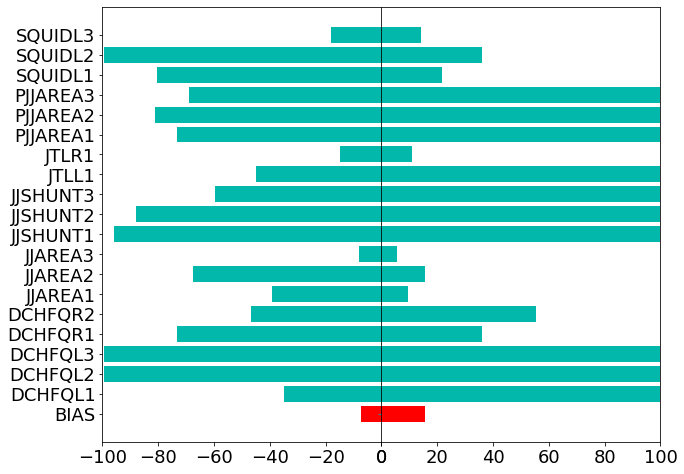

In [11]:
d2.get_margins(plot=True)

In [ ]:
netlist_data3 = """

.model jjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA)
.model pjjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA, PHI=PI)

* PYSQUID=====================================
.subckt psquid1        3  5 
L1                 3         1   #SQUIDL1(1.8)pH fcheck
L2                 3         4   #SQUIDL1(1.8)pH fcheck
B1                 1         5   jjmod area=#JJAREA1(v=0.43, shunt = JJSHUNT3)
R1                 1         5   #JJSHUNT1(16.09)ohm
B2                 2         5   jjmod area=#JJAREA1(v=0.43)
R2                 2         5   #JJSHUNT1(16.09)ohm
B3                 4         2   pjjmod area=#PJJAREA1(20, fix = true, dp = false)
.ends

.subckt psquid2        3  5 
L1                 3         1   #SQUIDL2(1.89)pH fcheck
L2                 3         4   #SQUIDL2(1.89)pH fcheck
B1                 1         5   jjmod area=#JJAREA2(v=0.49, shunt = JJSHUNT3)
R1                 1         5   #JJSHUNT2(15.82)ohm
B2                 2         5   jjmod area=#JJAREA2(v=0.49)
R2                 2         5   #JJSHUNT2(15.82)ohm
B3                 4         2   pjjmod area=#PJJAREA2(20, fix = true, dp = false)
.ends

.subckt psquid3        3  5 
L1                 3         1   #SQUIDL3(1.83)pH fcheck
L2                 3         4   #SQUIDL3(1.83)pH fcheck
B1                 1         5   jjmod area=#JJAREA3(v=0.46, shunt = JJSHUNT3)
R1                 1         5   #JJSHUNT3(15.41)ohm
B2                 2         5   jjmod area=#JJAREA3(v=0.46)
R2                 2         5   #JJSHUNT3(15.41)ohm
B3                 4         2   pjjmod area=#PJJAREA3(20, fix = true, dp = false)
.ends
* ============================================

.subckt DCHFQ 1 6 100
* 250-350  750-850  1250-1350
Rin                     1        2    #DCHFQR1(1000, dpv = 20)ohm
L0                      2        3    2pH fcheck
L1                      3        0    #DCHFQL1(46, dpv = 13)pH fcheck
X1       psquid1         3        4
L3                      4        5    #DCHFQL2(4.58)pH fcheck
L4                      5        6    #DCHFQL3(2.00, fix = true, dp=False)pH fcheck
R1                      100      5    #DCHFQR2(8.3)ohm
X2       psquid2         6        0
.ends

.subckt JTL     1  5  100
L1              1  2   #JTLL1(2.3, dpv = 15)pH fcheck
L2              2  3   #JTLL1(2.3)pH fcheck
L3              3  4   #JTLL1(2.3)pH fcheck
L4              4  5   #JTLL1(2.3)pH fcheck
X1    psquid3       3  0
X2    psquid3       5  0
R1               100  4   #JTLR1(8.82)ohm
R2               100  2   #JTLR1(8.82)ohm
.ends

.subckt JTL4    1  5  100
X1       JTL            1  2  100
X2       JTL            2  3  100
X3       JTL            3  4  100
X4       JTL            4  5  100
.ends

*** top cell:  
Vin                     1   0    PWL(0ps 0mV 440ps 0mV 450ps 25mV 550ps 25mV 560ps 0mV   840ps 0mV 850ps 25mV 950ps 25mV 960ps 0mV   1240ps 0mV 1250ps 25mV 1350ps 25mV 1360ps 0mV)
X1      DCHFQ           1   2  100
X2      JTL4            2   3   100
X3      JTL4            3   4   100
X4      JTL4            4   5   100

R2                      5     13  8.32ohm
L5                      13     0  2pH fcheck
Vb                      100    0  pwl(0ps 0mV 100ps #BIAS(v=0.1,fix = true, dp = false)mV)


**netlis file
.tran 1.0ps 2000ps 0ps 1ps



.print phase B1|X1|X1|X4
.print phase B2|X1|X1|X4

.end

**** optimize ****
* バイアス電圧の立ち上がり終了の時間
* EndTimeOfBiasRise=100e-12
* 初期パルスの入力開始時間
* StartTimeOfPulseInput=400e-12
* 許容できるパルスの遅延
* PulseDelay=4.0e-11
"""
d3 = data.Data(netlist_data3,plot=True)
d3.optimize("/home/tanetakumi/main/hfq-optimizer/template/optimize/hasegawadff2")

,low(value),low(%),high(value),high(%)
PJJAREA1,2.265625,-88.671875,40.000000,100.00000
JJSHUNT2,1.483125,-90.625000,31.640000,100.00000
PJJAREA2,1.953125,-90.234375,40.000000,100.00000
JJSHUNT1,0.502812,-96.875000,32.180000,100.00000
SQUIDL1,0.260156,-85.546875,2.868750,59.37500
SQUIDL2,1.122187,-40.625000,2.923594,54.68750
JJAREA2,0.390469,-20.312500,0.601016,22.65625
JJAREA1,0.253633,-41.015625,0.530781,23.43750
JJSHUNT3,6.741875,-56.250000,30.820000,100.00000
PJJAREA3,4.609375,-76.953125,40.000000,100.00000


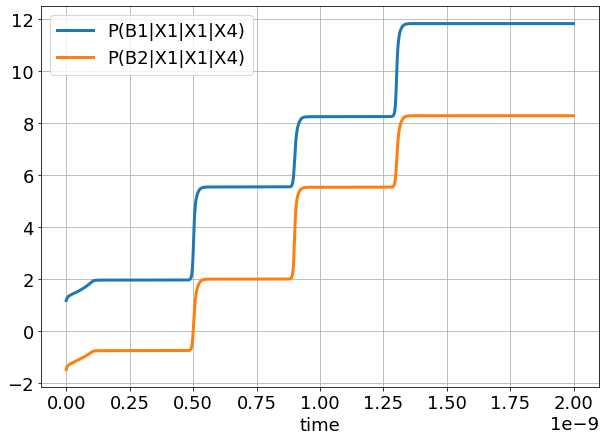

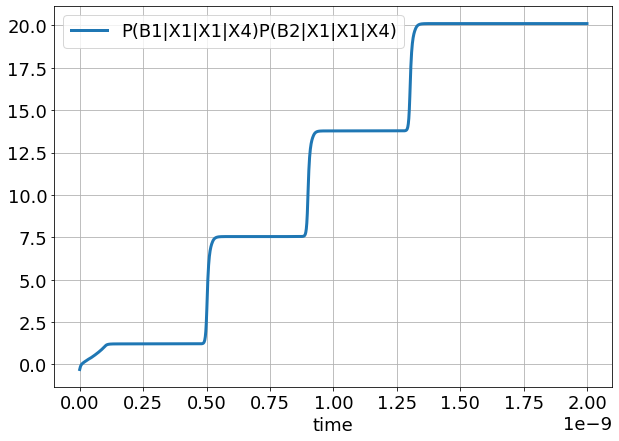

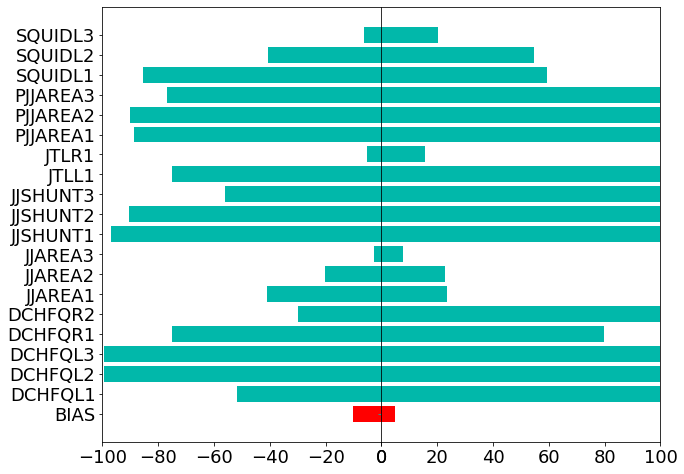

In [12]:
netlist_data3 = """

.model jjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA)
.model pjjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA, PHI=PI)

* PYSQUID=====================================
.subckt psquid1        3  5 
L1                 3         1   #SQUIDL1(1.8)pH fcheck
L2                 3         4   #SQUIDL1(1.8)pH fcheck
B1                 1         5   jjmod area=#JJAREA1(v=0.43, shunt = JJSHUNT3)
R1                 1         5   #JJSHUNT1(16.09)ohm
B2                 2         5   jjmod area=#JJAREA1(v=0.43)
R2                 2         5   #JJSHUNT1(16.09)ohm
B3                 4         2   pjjmod area=#PJJAREA1(20, fix = true, dp = false)
.ends

.subckt psquid2        3  5 
L1                 3         1   #SQUIDL2(1.89)pH fcheck
L2                 3         4   #SQUIDL2(1.89)pH fcheck
B1                 1         5   jjmod area=#JJAREA2(v=0.49, shunt = JJSHUNT3)
R1                 1         5   #JJSHUNT2(15.82)ohm
B2                 2         5   jjmod area=#JJAREA2(v=0.49)
R2                 2         5   #JJSHUNT2(15.82)ohm
B3                 4         2   pjjmod area=#PJJAREA2(20, fix = true, dp = false)
.ends

.subckt psquid3        3  5 
L1                 3         1   #SQUIDL3(1.75)pH fcheck
L2                 3         4   #SQUIDL3(1.75)pH fcheck
B1                 1         5   jjmod area=#JJAREA3(v=0.46, shunt = JJSHUNT3)
R1                 1         5   #JJSHUNT3(15.41)ohm
B2                 2         5   jjmod area=#JJAREA3(v=0.46)
R2                 2         5   #JJSHUNT3(15.41)ohm
B3                 4         2   pjjmod area=#PJJAREA3(20, fix = true, dp = false)
.ends
* ============================================

.subckt DCHFQ 1 6 100
* 250-350  750-850  1250-1350
Rin                     1        2    #DCHFQR1(1000, dpv = 20)ohm
L0                      2        3    2pH fcheck
L1                      3        0    #DCHFQL1(46, dpv = 13)pH fcheck
X1       psquid1         3        4
L3                      4        5    #DCHFQL2(4.58)pH fcheck
L4                      5        6    #DCHFQL3(2.00, fix = true, dp=False)pH fcheck
R1                      100      5    #DCHFQR2(8.3)ohm
X2       psquid2         6        0
.ends

.subckt JTL     1  5  100
L1              1  2   #JTLL1(2.3, dpv = 15)pH fcheck
L2              2  3   #JTLL1(2.3)pH fcheck
L3              3  4   #JTLL1(2.3)pH fcheck
L4              4  5   #JTLL1(2.3)pH fcheck
X1    psquid3       3  0
X2    psquid3       5  0
R1               100  4   #JTLR1(8.82)ohm
R2               100  2   #JTLR1(8.82)ohm
.ends

.subckt JTL4    1  5  100
X1       JTL            1  2  100
X2       JTL            2  3  100
X3       JTL            3  4  100
X4       JTL            4  5  100
.ends

*** top cell:  
Vin                     1   0    PWL(0ps 0mV 440ps 0mV 450ps 25mV 550ps 25mV 560ps 0mV   840ps 0mV 850ps 25mV 950ps 25mV 960ps 0mV   1240ps 0mV 1250ps 25mV 1350ps 25mV 1360ps 0mV)
X1      DCHFQ           1   2  100
X2      JTL4            2   3   100
X3      JTL4            3   4   100
X4      JTL4            4   5   100

R2                      5     13  8.32ohm
L5                      13     0  2pH fcheck
Vb                      100    0  pwl(0ps 0mV 100ps #BIAS(v=0.1,fix = true, dp = false)mV)


**netlis file
.tran 1.0ps 2000ps 0ps 1ps



.print phase B1|X1|X1|X4
.print phase B2|X1|X1|X4

.end

**** optimize ****
* バイアス電圧の立ち上がり終了の時間
* EndTimeOfBiasRise=100e-12
* 初期パルスの入力開始時間
* StartTimeOfPulseInput=400e-12
* 許容できるパルスの遅延
* PulseDelay=3.0e-11
"""
d3 = data.Data(netlist_data3,plot=True)
d3.get_margins(plot=True)

--- List of variables to optimize ---
              def     main      sub element    fix     shunt     dp   dpv  tmp
char                                                                          
SQUIDL1     1.743    1.743    1.743       L    0.0      None    1.0   7.0  0.0
JJAREA1     0.533    0.533    0.533       B  False  JJSHUNT3   True   7.0  0.0
JJSHUNT1   15.473   15.473   15.473       R  False      None   True   7.0  0.0
PJJAREA1   20.000   20.000   20.000       B   True      None  False   7.0  0.0
SQUIDL2     1.780    1.780    1.780       L  False      None   True   7.0  0.0
JJAREA2     0.471    0.471    0.471       B  False  JJSHUNT3   True   7.0  0.0
JJSHUNT2   16.354   16.354   16.354       R  False      None   True   7.0  0.0
PJJAREA2   20.000   20.000   20.000       B   True      None  False   7.0  0.0
SQUIDL3     2.110    2.110    2.110       L  False      None   True   7.0  0.0
JJAREA3     0.497    0.497    0.497       B  False  JJSHUNT3   True   7.0  0.0
JJSHUNT3   16.

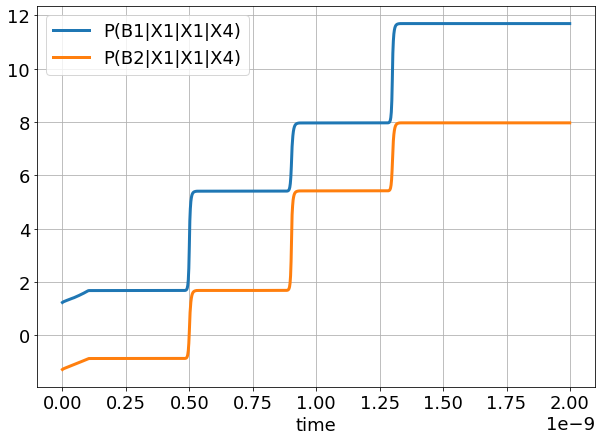

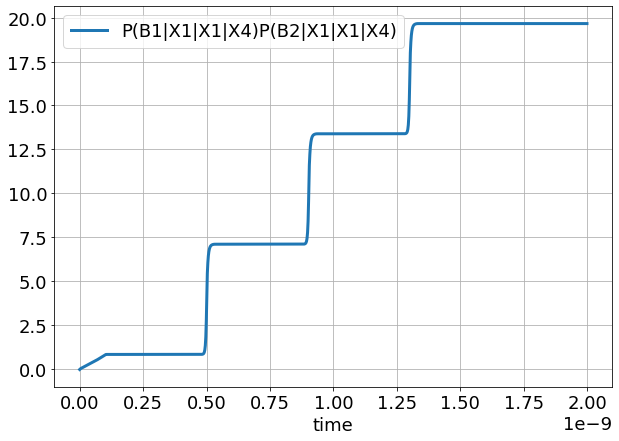

In [11]:
netlist_data4 = """

.model jjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA)
.model pjjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA, PHI=PI)

* PYSQUID=====================================
.subckt psquid1        3  5 
L1                 3         1   #SQUIDL1(1.743)pH fcheck
L2                 3         4   #SQUIDL1(1.743)pH fcheck
B1                 1         5   jjmod area=#JJAREA1(v=0.533, shunt = JJSHUNT3)
R1                 1         5   #JJSHUNT1(15.473)ohm
B2                 2         5   jjmod area=#JJAREA1(v=0.533)
R2                 2         5   #JJSHUNT1(15.473)ohm
B3                 4         2   pjjmod area=#PJJAREA1(20, fix = true, dp = false)
.ends

.subckt psquid2        3  5 
L1                 3         1   #SQUIDL2(1.78)pH fcheck
L2                 3         4   #SQUIDL2(1.78)pH fcheck
B1                 1         5   jjmod area=#JJAREA2(v=0.471, shunt = JJSHUNT3)
R1                 1         5   #JJSHUNT2(16.354)ohm
B2                 2         5   jjmod area=#JJAREA2(v=0.471)
R2                 2         5   #JJSHUNT2(16.354)ohm
B3                 4         2   pjjmod area=#PJJAREA2(20, fix = true, dp = false)
.ends

.subckt psquid3        3  5 
L1                 3         1   #SQUIDL3(2.11)pH fcheck
L2                 3         4   #SQUIDL3(2.11)pH fcheck
B1                 1         5   jjmod area=#JJAREA3(v=0.497, shunt = JJSHUNT3)
R1                 1         5   #JJSHUNT3(16.467)ohm
B2                 2         5   jjmod area=#JJAREA3(v=0.497)
R2                 2         5   #JJSHUNT3(16.467)ohm
B3                 4         2   pjjmod area=#PJJAREA3(20, fix = true, dp = false)
.ends
* ============================================

.subckt DCHFQ 1 6 100
* 250-350  750-850  1250-1350
Rin                     1        2    #DCHFQR1(467.5, dpv = 20)ohm
L0                      2        3    2pH fcheck
L1                      3        0    #DCHFQL1(20.527, dpv = 13)pH fcheck
X1       psquid1         3        4
L3                      4        5    #DCHFQL2(4.345)pH fcheck
L4                      5        6    #DCHFQL3(2.00, fix = true, dp=False)pH fcheck
R1                      100      5    #DCHFQR2(38.263)ohm
X2       psquid2         6        0
.ends

.subckt JTL     1  5  100
L1              1  2   #JTLL1(4.427, dpv = 15)pH fcheck
L2              2  3   #JTLL1(4.427)pH fcheck
L3              3  4   #JTLL1(4.427)pH fcheck
L4              4  5   #JTLL1(4.427)pH fcheck
X1    psquid3       3  0
X2    psquid3       5  0
R1               100  4   #JTLR1(43)ohm
R2               100  2   #JTLR1(43)ohm
.ends

.subckt JTL4    1  5  100
X1       JTL            1  2  100
X2       JTL            2  3  100
X3       JTL            3  4  100
X4       JTL            4  5  100
.ends

*** top cell:  
Vin                     1   0    PWL(0ps 0mV 440ps 0mV 450ps 25mV 550ps 25mV 560ps 0mV   840ps 0mV 850ps 25mV 950ps 25mV 960ps 0mV   1240ps 0mV 1250ps 25mV 1350ps 25mV 1360ps 0mV)
X1      DCHFQ           1   2  100
X2      JTL4            2   3   100
X3      JTL4            3   4   100
X4      JTL4            4   5   100

R2                      5     13  8.32ohm
L5                      13     0  2pH fcheck
Vb                      100    0  pwl(0ps 0mV 100ps #BIAS(v=0.5,fix = true, dp = false)mV)


**netlis file
.tran 1.0ps 2000ps 0ps 1ps



.print phase B1|X1|X1|X4
.print phase B2|X1|X1|X4

.end

**** optimize ****
* バイアス電圧の立ち上がり終了の時間
* EndTimeOfBiasRise=100e-12
* 初期パルスの入力開始時間
* StartTimeOfPulseInput=400e-12
* 許容できるパルスの遅延
* PulseDelay=4.0e-11
"""
d3 = data.Data(netlist_data4,True)
d3.optimize("/home/tanetakumi/main/hfq-optimizer/template/optimize/hasegawadff4")

,low(value),low(%),high(value),high(%)
SQUIDL1,0.006738,-99.609375,3.450000,100.00000
PJJAREA1,0.078125,-99.609375,40.000000,100.00000
JJSHUNT1,0.062852,-99.609375,32.180000,100.00000
JJAREA1,0.002188,-99.609375,1.120000,100.00000
PJJAREA2,0.078125,-99.609375,40.000000,100.00000
SQUIDL2,0.007188,-99.609375,3.680000,100.00000
JJSHUNT2,0.061797,-99.609375,31.640000,100.00000
JJAREA2,0.002000,-99.609375,1.024000,100.00000
SQUIDL3,0.654961,-68.359375,4.140000,100.00000
JJAREA3,0.002125,-99.609375,1.088000,100.00000


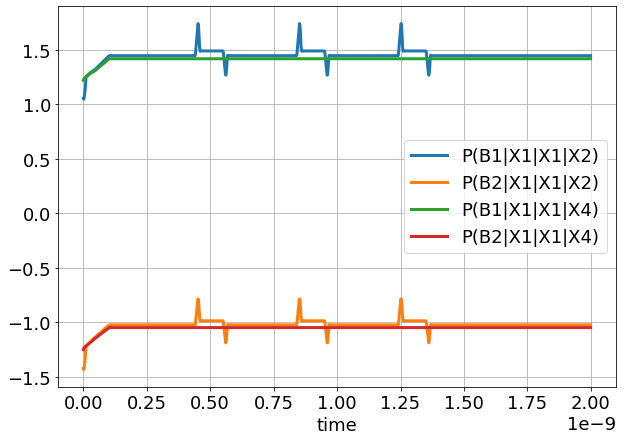

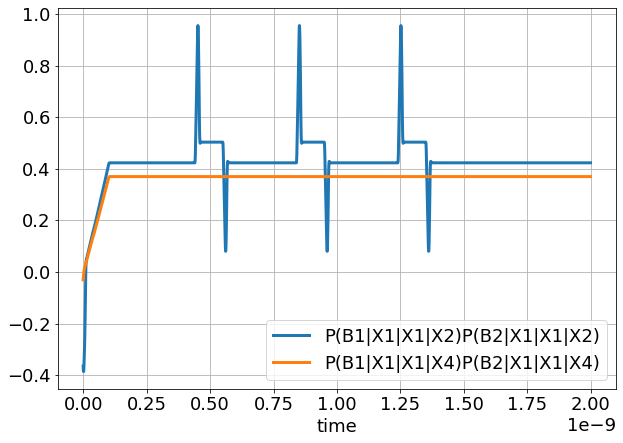

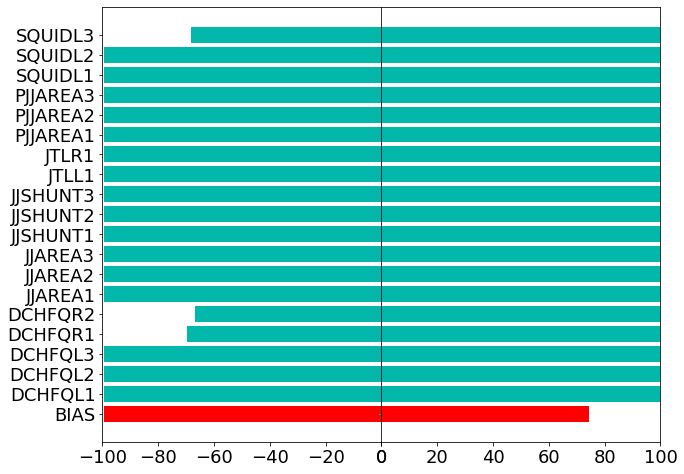

In [16]:
netlist_data5 = """

.model jjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA)
.model pjjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA, PHI=PI)

* PYSQUID=====================================
.subckt psquid1        3  5 
L1                 3         1   #SQUIDL1(1.725)pH fcheck
L2                 3         4   #SQUIDL1(1.725)pH fcheck
B1                 1         5   jjmod area=#JJAREA1(v=0.56, shunt = JJSHUNT3)
R1                 1         5   #JJSHUNT1(16.09)ohm
B2                 2         5   jjmod area=#JJAREA1(v=0.56)
R2                 2         5   #JJSHUNT1(16.09)ohm
B3                 4         2   pjjmod area=#PJJAREA1(20, fix = true, dp = false)
.ends

.subckt psquid2        3  5 
L1                 3         1   #SQUIDL2(1.84)pH fcheck
L2                 3         4   #SQUIDL2(1.84)pH fcheck
B1                 1         5   jjmod area=#JJAREA2(v=0.512, shunt = JJSHUNT3)
R1                 1         5   #JJSHUNT2(15.82)ohm
B2                 2         5   jjmod area=#JJAREA2(v=0.512)
R2                 2         5   #JJSHUNT2(15.82)ohm
B3                 4         2   pjjmod area=#PJJAREA2(20, fix = true, dp = false)
.ends

.subckt psquid3        3  5 
L1                 3         1   #SQUIDL3(2.07)pH fcheck
L2                 3         4   #SQUIDL3(2.07)pH fcheck
B1                 1         5   jjmod area=#JJAREA3(v=0.544, shunt = JJSHUNT3)
R1                 1         5   #JJSHUNT3(15.41)ohm
B2                 2         5   jjmod area=#JJAREA3(v=0.544)
R2                 2         5   #JJSHUNT3(15.41)ohm
B3                 4         2   pjjmod area=#PJJAREA3(20, fix = true, dp = false)
.ends
* ============================================

.subckt DCHFQ 1 6 100
* 250-350  750-850  1250-1350
Rin                     1        2    #DCHFQR1(374, dpv = 20)ohm
L0                      2        3    2pH fcheck
L1                      3        0    #DCHFQL1(18.25, dpv = 13)pH fcheck
X1       psquid1         3        4
L3                      4        5    #DCHFQL2(4.26)pH fcheck
L4                      5        6    #DCHFQL3(2.00, fix = true, dp=False)pH fcheck
R1                      100      5    #DCHFQR2(35.57)ohm
X2       psquid2         6        0
.ends

.subckt JTL     1  5  100
L1              1  2   #JTLL1(2.07, dpv = 15)pH fcheck
L2              2  3   #JTLL1(2.07)pH fcheck
L3              3  4   #JTLL1(2.07)pH fcheck
L4              4  5   #JTLL1(2.07)pH fcheck
X1    psquid3       3  0
X2    psquid3       5  0
R1               100  4   #JTLR1(45)ohm
R2               100  2   #JTLR1(45)ohm
.ends

.subckt JTL4    1  5  100
X1       JTL            1  2  100
X2       JTL            2  3  100
X3       JTL            3  4  100
X4       JTL            4  5  100
.ends

*** top cell:  
Vin                     1   0    PWL(0ps 0mV 440ps 0mV 450ps 25mV 550ps 25mV 560ps 0mV   840ps 0mV 850ps 25mV 950ps 25mV 960ps 0mV   1240ps 0mV 1250ps 25mV 1350ps 25mV 1360ps 0mV)
X1      DCHFQ           1   2  100
X2      JTL4            2   3   100
X3      JTL4            3   4   100
X4      JTL4            4   5   100

R2                      5     13  8.32ohm
L5                      13     0  2pH fcheck
Vb                      100    0  pwl(0ps 0mV 100ps #BIAS(v=0.3,fix = true, dp = false)mV)


**netlis file
.tran 1.0ps 2000ps 0ps 1ps

.print phase B1|X1|X1|X2
.print phase B2|X1|X1|X2

.print phase B1|X1|X1|X4
.print phase B2|X1|X1|X4

.end

**** optimize ****
* バイアス電圧の立ち上がり終了の時間
* EndTimeOfBiasRise=100e-12
* 初期パルスの入力開始時間
* StartTimeOfPulseInput=400e-12
* 許容できるパルスの遅延
* PulseDelay=3.0e-11
"""
d5 = data.Data(netlist_data5,plot=True)
d5.shunt_apply()
d5.get_margins(plot=True)